 # The first thing we do is load relevant libraries to be used #

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.fftpack
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [20, 5]

Since all the data files are small (~10's of MB), they can be loaded all at once into memory.

In practice, it is usually a good idea to take a look at each file as you load it.

In [3]:
Data_Ahmad_Adam_Varun = pd.read_csv("RawTextFiles/Ahmad_Adam_Varun.TXT", index_col=False)

Data_Dylan_OT = pd.read_csv("RawTextFiles/Dylan_OT.TXT", index_col=False)

Data_Patricia_Gabby = pd.read_csv("RawTextFiles/Patricia_Gabby.TXT", index_col=False)

Data_PEPG_Averaged = pd.read_csv("RawTextFiles/PEPG_Averaged_fullTXT.txt", index_col=False)

Data_SSL = pd.read_csv("RawTextFiles/SSL.TXT", index_col=False)

Data_TheAvengers_Levi_Jason = pd.read_csv("RawTextFiles/TheAvengers_Levi_Jason.TXT", index_col=False)

## Any of the data files would work for the rest, just substitute whichever you use ##

In [4]:
Data_Patricia_Gabby.head()

,Time,TVOC,CO2,Ozone,UnfilteredPM,FilteredPM
0,291,0,400,61,0.10,0.01
1,1482,0,400,79,0.61,0.07
2,2717,0,400,78,0.66,0.13
3,3957,0,400,84,0.56,0.17
4,5188,0,400,89,0.51,0.21


Time (ms) is kind of a pain to work with, let's do something like "hours since start"

In [5]:
# convert the Time column to the numbers of hours since the start (time = 0)
def convert_time_to_time_since_start(row):
    time = row["Time"]
    # divide by number of ms in an hour
    ms_in_hour = 1000 * 60 * 60
    time = float(time/ms_in_hour)
    return time    

Now let's apply this time renaming to a dataset

In [6]:
Data_Patricia_Gabby["TimeSinceStart"] = Data_Patricia_Gabby.apply(convert_time_to_time_since_start, axis=1)
Data_Patricia_Gabby.head()

,Time,TVOC,CO2,Ozone,UnfilteredPM,FilteredPM,TimeSinceStart
0,291,0,400,61,0.10,0.01,0.000081
1,1482,0,400,79,0.61,0.07,0.000412
2,2717,0,400,78,0.66,0.13,0.000755
3,3957,0,400,84,0.56,0.17,0.001099
4,5188,0,400,89,0.51,0.21,0.001441


Let's plot what each of the values look like over time since the start (in hours).

Exercise: Play with the plots to add axes titles

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0a1117ada0>,
      dtype=object)

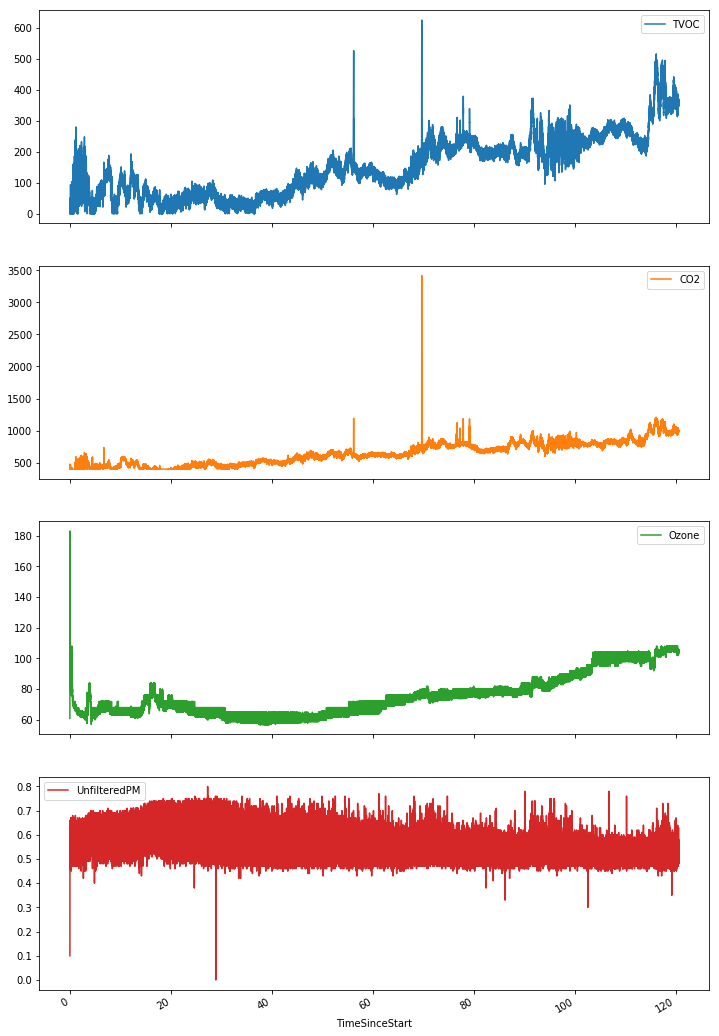

In [7]:
Data_Patricia_Gabby.plot(x='TimeSinceStart', y = ["TVOC", "CO2", "Ozone", "UnfilteredPM"], figsize=(12,20), subplots=True)

Do you notice any interesting behaviors of the data? Think about the first few things that catch your eye.

What catches my eye for a few of the plots (TVOC in particular) is that the data seems to have similar, repeating patterns (we call this periodic). There is a neat trick to investigate this that can be used here:

In [13]:
np_fft = np.fft.rfft(Data_Patricia_Gabby["TVOC"]) # This calculates how periodic the data is

In [14]:
freq = np.fft.rfftfreq(len(Data_Patricia_Gabby["TVOC"]), d = (1.281/(60*60)))
# This creates the x-axis (technically frequency axis) for the np_fft data

(10000.0, 10000000.0)

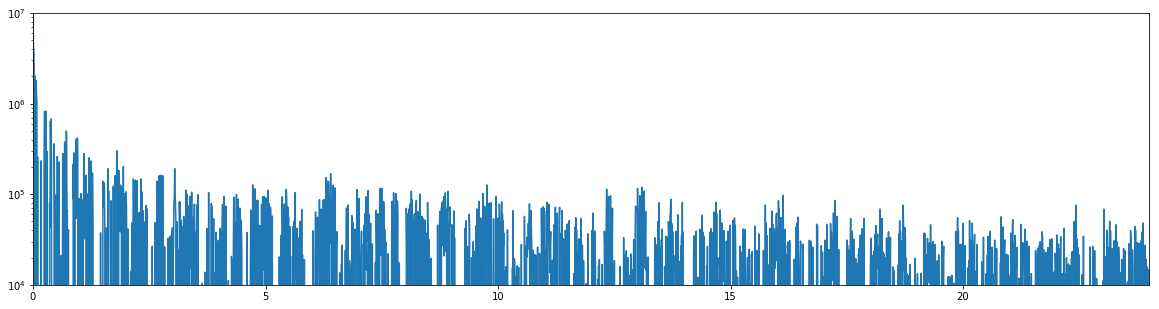

In [16]:
# plot the values
plt.plot(freq, np_fft)
plt.yscale("log") # make this a log plot on the y-axis
plt.xlim((1e-3, 24)) # set the range on the x-axis
plt.ylim((1e4, 1e7)) # set the range on the y-axis

This doesn't look too intriguing, but there are a few reasons the data doesn't play well with this `fft` function. Namely, the linear rise in the data will mess up this function (it does well with a pure sine wave, for example).

If you have time, you can try to adjust this and see what results!